In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import monpa
import jieba.analyse
import codecs
from glob import glob
import nltk

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [2]:
files = glob('./自主監測/中時新聞/*_cleaned.csv')

df_china = pd.concat((pd.read_csv(file, usecols = ['cleaned_text'], dtype = {'cleaned_text':str})for file in files), ignore_index = True)

df_china = df_china['cleaned_text']
df_china

0      朋友 確診 隔離 快篩 陽性 懶人 包 確診 急速 攀升 天 千 例確診 感染 Omicro...
1      竹市 ＋ 匡列 居隔 外縣市 足跡 重疊 新竹市 日 新增 名 確診 例 受 匡列 採檢 居...
2      職場 健保 快易通 PCR 輕鬆 查 企業 快篩 檢測 護 員工 徵 出門 健保 資訊 抓 ...
3      免費 PCR 快篩劑 快 全 台 新冠 肺炎 疫情 持續 擴大 確診 掌握 全 台 免費 P...
4      Omicron 春節 恐 侵 台 台 全 防疫 寶 少為 防範 Omicron 變異株 流行...
                             ...                        
748    汽車 百貨業 跨 足 賣 防疫 保健品 汽車 百貨 業者 抗 疫 維繫 營運 拓展 業務 焦...
749    開學 長庚科大 送 新生 快篩 試劑 開學 長庚科技大學 送給 新生 健康 關懷禮 包含 快...
750    新北市 議員 江怡臻 媒合 生技 公司 助 弱勢 捐贈 劑 居家 快篩 試劑 級 警戒 持續...
751    桃園 供 劑 快 篩 雇用 移工 單位 基層 診所 發放 劑 遠雄 貿港區 疫情 擴大 近期...
752    收假 倒數 開工 須 持 陰性 證明 桃園藥局 快 篩試劑 銷量 成長 農曆 春節 長達 天...
Name: cleaned_text, Length: 753, dtype: object

In [3]:
df_china = df_china.values.tolist()
df_china[0]

'朋友 確診 隔離 快篩 陽性 懶人 包 確診 急速 攀升 天 千 例確診 感染 Omicron 變異 株 逾 % 症狀 輕症 指揮中心 防疫 減災 減少 輕症 家 分流 措施 象徵 疫情 步入 模 染疫 階段 民眾 朋友 確診 快篩 陽性 隔離 問題 高度 關注 朋友 確診 隔離 指揮中心 表示 獲得 衛生 單位 通知 指示 前 先 留在 家 隔離 症狀 求助 密切 接觸 匡列 隔離 標準 前 天 隔離 前 面對面 接觸 超過 分鐘 快篩 陽性 民眾 器材 包好 帶去 社區 採檢站 PCR 核酸 檢測 勿 搭 交通 工具 快篩 陰性 包好 丟棄 整理 相關 項 防疫 資訊 供 民眾 參考 朋友 身邊 確診 密切 接觸 請 先 留在 家 戴 口罩 隔離 避免 共餐 接觸 特別 老人 衛生 單位 通知 指示 出現 發燒 喉嚨 痛 腹瀉 嗅 味覺 異常 症狀 聯繫 衛生局 撥打 密切 接觸 請 健康 監測 天 期間 疑似 症狀 請 戴 口罩 社區 採檢站 採檢 算是 密切 接觸 匡列 確診 發病 前 天 隔離 前 確診 面對 面 接觸 分鐘 算 密切 接觸 列為 居家 隔離 沒有 直接 接觸到 確診者 匡列 太太 確診 匡列 居家 隔離 檢測 居家 隔離 天數 天 確診 接觸 日 隔 天 算 天 隔離 期滿 前 檢驗 陰性 解除 隔離 天 繼續 健康 天 隔離 期間 天 健康 天 公費 家用 快篩 試劑 檢測 共 外面 接到 衛生 單位 通知 匡 列為 居家 隔離 接到 電話 通知 立即 生效 須 開車 騎車 步行 返家 隔離 禁止 搭乘 運輸 工具 全程 佩戴 口罩 回不了 家者 衛生局 電話 安排 防疫 車輛 ● 診者 足跡 重疊 收到 簡訊 辦 收到 細胞 簡訊 匡列 提醒 民眾 健康 監測 採檢站 公費 採檢 喉嚨 痛 症狀 速 採檢 健康 監測 期間 避免 出入 眾多 參加 活動 外出 必須 外出 應 全程 戴 口罩 完全 沒有 出現 症狀 正常 生活 ● 什麼 情況 快篩 住 確診數較多 呼吸道 症狀 確診者 足跡 熱區 確診者 接觸 史等 情況 建議 居家 快篩 ● 快篩 陽性 辦 居家 隔離 快篩 陽性 立即 聯絡 衛生局 防疫 專線 指示 處理 快篩 陽性 先 檢測 器材 密封 帶到 社區 採檢站 進一步 PCR 檢測 勿 搭乘 交通 工具 快篩 陰性

In [18]:
df_china[9]

'黃偉哲 ＋ 翻盤 鼓勵 民眾 居家 快篩 台南市 維持 天 + 厝 高雄 天 暴增 例 市長 黃偉哲 面對 疫情 放鬆 零確 診到 翻盤 居家 快 篩 試劑 開賣 鼓勵 市民 居家 快篩 強調 普遍 施打 疫苗 前 快篩 權宜 計 衛生局長 許以霖 持續 擴大 接種 疫苗 擬 推行 台南 歐美 居家 快篩 普及化 端午 跨 縣市 移動 產生 隱形 傳播 鏈 未 知 台北 農產運銷公司 群聚 感染 事件 擴大 需 密切 觀察 呼籲 移動 縣市 少 少 免 免 黃偉哲 鼓勵 民眾 居家 快篩 外面 暴露 排隊 居家 快篩 疫苗 尚未 全面 施打 快篩 失為 權宜 計 全球 疫情 急遽 升溫 歐美 國 疫情 開放 民眾 居家 快篩 避免 醫院 增加 群聚 目前 超商 買到 快篩 試 劑 擬 計畫 推廣 市民 養成 快篩 習慣 許以霖 目前 國人 接種 疫苗 覆蓋率 低 算 疫苗 代表 疫情 消失 歐美 民眾 普遍 習慣 居家 快篩 南市 方向 推廣 台南市 目前 天 篩檢 約 省下 部分 篩檢 醫療 成本 疫情 長期 抗戰 緊繃 醫護 量能 絕對 昨 公布 例 確診者 足跡 台南 高雄市 案 案 台南 醫院 停留 永康區 俗俗 賣 生鮮 超市 分鐘 屏東 案 日 度 佳里區 法旨宮 問事 宮廟 禁止 入內 男子 短暫 停留 匡列 廟方 友人 共 採檢 皆 陰性 昨 新增 例 疑 接種 AZ 疫苗 反應 住 護理 家 分別 慢性 病史 歲 女性 日 接種 日 喘 氣 送醫 治療 歲 慢性 肺 阻塞 病變 婦人 日 接種 日 呼吸 急促 送醫 治療 歲 失智 長期 臥床婦 日 接種 日 例 通報 台南 截至 昨日 接種 疫苗 死亡 共 例'

In [4]:
files = glob('./自主監測/自由新聞/*_cleaned.csv')

df_free = pd.concat((pd.read_csv(file, usecols = ['cleaned_text'], dtype = {'cleaned_text':str})for file in files), ignore_index = True)

df_free = df_free['cleaned_text']
df_free

0      高雄市 + 陳其邁 宣布 強化 防疫 措施 國內 疫情 升溫 高雄市 針對 四 國營 事業 ...
1      竹縣 + 明新科大 新湖 國小 停課 新竹 縣府 防疫 清消 高 風險 場所 竹縣府 提供 ...
2      強化 社區 監測 增加 定點 診所 發放 公費 快篩試劑 家用 快篩試劑 定點 診所 採檢院...
3      泰安 民宿 老闆 確診 苗 縣府 匡列 公布 足跡 清消 苗栗縣 新增 確診 足跡 遍及 尚...
4      藍委 質疑 普篩 陳時中 外國 疫情 趨緩 非 篩檢 疫苗 立法院 邀請 行政院長 蘇貞昌 ...
                             ...                        
555    北市 警文山一分局 確診 安排 全 局 快篩 北市 文山一分局 群聚 感染 擴大 陽性 確診...
556    基隆 全民 防疫 愛心 篩檢 首日 發 劑 基隆市 全民 防疫 愛心 篩檢 率先 仁愛區 開...
557    全 國 首 基隆 實施 類 普篩 市民 檢測 ／ 指揮中心 提供 家用 快篩 週 結果 出爐...
558    武肺 口服藥 庫存 充足 快篩 試劑 降價 醫師 公會 全聯會 理事長 柯富揚 表示 十八 ...
559    藍智庫 諷 蔡 政府 防疫 沒 超前 國民黨 智庫國家 政策 研究基金會 執行長 柯志恩 質...
Name: cleaned_text, Length: 560, dtype: object

In [5]:
df_free = df_free.values.tolist()
df_free[0]

'高雄市 + 陳其邁 宣布 強化 防疫 措施 國內 疫情 升溫 高雄市 針對 四 國營 事業 台電 台船 紅區 祭出 強化 防疫 措施 高雄市 衛生局 提供 〔 記者 葛祐豪 ／ 高雄 報導 〕 國內 疫情 升溫 高雄 前鎮區 化工廠 群聚 感染 增 例 累計 達 例 高雄 市長 陳其邁 強調 目前 社區 傳染 風險 應 檢疫 措施 調整 針對 防疫 旅館 線 工作 四 國營 事業 台船 紅區 祭出 強化 防疫 措施 陳其邁 防疫 記者會 表示 高雄 新增 確診 均 隔離 期間 陰轉陽 匡列 隔離 期間 採檢 確診 社區 傳播 風險 請 繼續 閱讀 ... 陳其邁 化工廠 群聚 感染 指標 發病 日 日 確診 傳給 密閉 空間 通風 共餐 情況 採 圈 匡列 星期五 接下來 匡列 隔離 發病 指出 病毒株 BA . 沒 包括 入境 % 漏出 防疫 旅館 風險 港口 感染 排除 高雄 群聚 感染源 陳其邁 強調 應 檢疫 措施 調整 面對 新 狀況 參酌 基隆 桃園 採取 加嚴 措施 特定 娛樂 場所 劑 規定 相同 陳其邁 宣布 高雄市 加強 防疫 措施 防疫 旅館 線 工作 週 應 居家 快篩 公費 提供 四 國營 事業 台電 台船 紅區 週三 快篩 捷運 國營 事業 重大 公共 工程 家 關鍵 產業 住宿 週 完成 快篩 集 合式 住宿 員工 含 國 外籍 特殊 情況 應 完成 劑 疫苗 接種 加工 出口區 工業區 關鍵 產業 工廠 應 落實 防疫 計畫 強化 餐廳 宿舍 交通車 防疫 前鎮 仁愛 公園 設立 社區 篩檢站 : - : : - : : - : : - : : - : : - : : - : : - : 確診 足跡 重疊 接觸史 民眾 請 攜帶 健保卡 前往 篩檢 武漢 肺炎 專區 請 點 相關 訊息 帶 掌握 抽 搶 現在 APP 新聞 保證 天天中獎 點 APP 活動 辦法'

In [4]:
df_free[2]

'強化 社區 監測 增加 定點 診所 發放 公費 快篩試劑 家用 快篩試劑 定點 診所 採檢院所 圖 指揮中心 提供 〔 記者 邱芷柔 ／ 台北 報導 〕 疫情 新增數 場域 感染 源待 釐清 群聚 事件 強化 社區 監測 流行 疫情 指揮中心 發言人 莊人祥今 日 宣布 協助 發放 公費 COVID - 家用 快篩 試劑 定點 目前 家 增加 家 基層 定點 診所 衛生所 發放點 衛生 福利部 疾病管制署 全球 資訊網 COVID - 防疫 專區 查詢 呼籲 需求 民眾 善加 利用 提醒 COVID - 症狀 感冒 相似 民眾 出現 呼吸道 症狀 加 前往 定點 診所 醫師 評估 發放 試劑 居家 檢驗 回報 快篩 結果 居家 快篩 檢驗 陽性 請 勿 慌張 儘速 鄰近 指定 社區 採檢院所 進 PCR 檢驗 繼續 閱讀 ... 公費 家用 快篩試劑 發放 診所 核酸 檢驗 指定 機構 資訊 衛生福利部 疾病 全球 資訊網 COVID - 防疫 專區 臺灣 社交 App 採檢 / 發放 公費 COVID - 家用 快篩試劑 社區 定點 診所 COVID - 全 國 指定 社區 採檢院所 查詢 感染 病毒 高 診數 區域 確診 足跡 熱區 確診者 接觸史 眾多 確 診者 足跡 重疊 民眾 覺 風險 出現 呼吸道 症狀 請 佩戴 醫 口罩 前往 掛號 醫師 評估 發放 試劑 檢驗 COVID - 家用 快篩 試劑 醫療 器材 販賣 業者 藥粧店 醫療 器材行 便利商店 藥局 購買 提醒 民眾 購買 請 確認 產品 名稱 家用 包裝 刊載 防疫 專案 核准 製造 X XXXXXXXX X 號 防疫 專案 核准 輸入 X X XXXXX XX X 號 字樣 產品 效期 期間 保存 期限 操作 影片 進行 採檢 操作 家用 快篩試劑 疑問 請 洽 原 購買 產品 醫療 器材商 藥局 逕 洽試劑 廠商 表示 COVID - 家 快 篩試劑 產品 核准 名單 產品 操作 影片 相關 資料 均 食藥署 網站 家 新型 冠狀 病毒 檢驗 試劑 專區 查詢 武漢 肺炎 專區 請 點 相關 訊息 帶 掌握 抽 搶 現在 APP 新聞 保證 天天 點 APP 活動 辦法'

## 中時的去贅字與文字雲

In [18]:
import nltk
all = []
word = []
stop_word=[')','(', '％', '款', '國', '未', '新', '名', '請', '外', '台', '需', '約', '應', '日', '進行', '指出',
           '-', '月', '先', '前', '高', '全', '家', '天', '劑', '元', '類', '達', '表示', '快', '提供', '篩試劑',
          '結果', '目前', '例', '相關', '相關', '公司', '沒', '沒有', '需要', '快速', '接種', '核准', '發放', '宣布',
          '希望', '協助', '市場', '計畫', '販售', '針對', '施打', '呼籲', '出現', '工作', '業者', '申請', '建議', 
          '強調', '進口', '昨', '週']

for i in range(len(df_china)):
    word = df_china[i].split(' ')
    for j in range(len(word)):
         if word[j] not in stop_word:
            all.append(word[j])
all

['朋友',
 '確診',
 '隔離',
 '快篩',
 '陽性',
 '懶人',
 '包',
 '確診',
 '急速',
 '攀升',
 '千',
 '例確診',
 '感染',
 'Omicron',
 '變異',
 '株',
 '逾',
 '%',
 '症狀',
 '輕症',
 '指揮中心',
 '防疫',
 '減災',
 '減少',
 '輕症',
 '分流',
 '措施',
 '象徵',
 '疫情',
 '步入',
 '模',
 '染疫',
 '階段',
 '民眾',
 '朋友',
 '確診',
 '快篩',
 '陽性',
 '隔離',
 '問題',
 '高度',
 '關注',
 '朋友',
 '確診',
 '隔離',
 '指揮中心',
 '獲得',
 '衛生',
 '單位',
 '通知',
 '指示',
 '留在',
 '隔離',
 '症狀',
 '求助',
 '密切',
 '接觸',
 '匡列',
 '隔離',
 '標準',
 '隔離',
 '面對面',
 '接觸',
 '超過',
 '分鐘',
 '快篩',
 '陽性',
 '民眾',
 '器材',
 '包好',
 '帶去',
 '社區',
 '採檢站',
 'PCR',
 '核酸',
 '檢測',
 '勿',
 '搭',
 '交通',
 '工具',
 '快篩',
 '陰性',
 '包好',
 '丟棄',
 '整理',
 '項',
 '防疫',
 '資訊',
 '供',
 '民眾',
 '參考',
 '朋友',
 '身邊',
 '確診',
 '密切',
 '接觸',
 '留在',
 '戴',
 '口罩',
 '隔離',
 '避免',
 '共餐',
 '接觸',
 '特別',
 '老人',
 '衛生',
 '單位',
 '通知',
 '指示',
 '發燒',
 '喉嚨',
 '痛',
 '腹瀉',
 '嗅',
 '味覺',
 '異常',
 '症狀',
 '聯繫',
 '衛生局',
 '撥打',
 '密切',
 '接觸',
 '健康',
 '監測',
 '期間',
 '疑似',
 '症狀',
 '戴',
 '口罩',
 '社區',
 '採檢站',
 '採檢',
 '算是',
 '密切',
 '接觸',
 '匡列',
 '確診',
 '發病',
 '隔離',
 '確診',
 '面對',
 '面',
 '接觸',

In [19]:
fdist = nltk.FreqDist(all)
fdist.most_common(100)

[('快篩', 4048),
 ('試劑', 2005),
 ('疫情', 1463),
 ('防疫', 1294),
 ('民眾', 1242),
 ('居家', 1113),
 ('檢測', 1001),
 ('篩檢', 944),
 ('疫苗', 803),
 ('病毒', 745),
 ('政府', 712),
 ('確診', 679),
 ('台灣', 624),
 ('企業', 609),
 ('PCR', 581),
 ('採檢', 572),
 ('指揮中心', 532),
 ('新冠', 528),
 ('抗原', 528),
 ('社區', 512),
 ('陽性', 468),
 ('陳時中', 446),
 ('家用', 429),
 ('價格', 399),
 ('檢驗', 388),
 ('醫療', 385),
 ('國內', 374),
 ('感染', 363),
 ('症狀', 360),
 ('陰性', 339),
 ('快篩試劑', 331),
 ('風險', 330),
 ('隔離', 327),
 ('醫院', 321),
 ('健康', 315),
 ('持續', 310),
 ('普篩', 305),
 ('肺炎', 304),
 ('開放', 300),
 ('需求', 297),
 ('產品', 297),
 ('員工', 293),
 ('廠商', 283),
 ('口罩', 275),
 ('購買', 272),
 ('措施', 242),
 ('核酸', 239),
 ('市府', 237),
 ('基隆', 225),
 ('快篩劑', 223),
 ('桃園', 211),
 ('美國', 211),
 ('衛生局', 205),
 ('專案', 205),
 ('流行', 203),
 ('接觸', 202),
 ('執行', 201),
 ('免費', 199),
 ('未來', 195),
 ('包括', 195),
 ('新增', 194),
 ('方式', 194),
 ('捐贈', 193),
 ('完成', 192),
 ('公布', 190),
 ('群聚', 190),
 ('取得', 190),
 ('公費', 189),
 ('擴大', 187),
 ('單位', 186),
 ('透過

In [20]:
stopwords = {}.fromkeys(["『","』","【","】","（", "）", '%', "●", "+", "/", "-"])

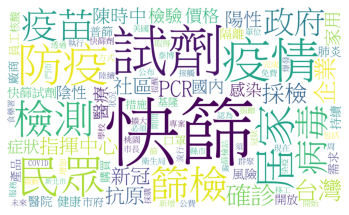

<Figure size 1000x600 with 0 Axes>

In [21]:
def generate_wordcloud(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "./TW-Sung-98_1.ttf",
                   background_color = "white",
                   max_words = 100, stopwords = stopwords,
                   width=2000, height=1200)
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize = (10, 6), dpi = 100)
    plt.show()
    wc.to_file('./文字雲/自主監測_中時.jpg')

# def get_keywords(file_path, topN):
#     keywords = {}
#     with open(file_path, "r", encoding = "utf-8") as f:
#         corpus = ""
#         for line in f:
#             corpus = f'{corpus}{" ".join(monpa.cut(line))}'
#         tags = jieba.analyse.extract_tags(corpus, topK = topN, withWeight = True)
#         for tag, weight in tags:
#             keywords[tag] = weight
#     return keywords

# keywords = get_keywords('./selft.txt', 30)
# print(keywords)
generate_wordcloud(fdist, stopwords, "./selft_wordcloud1.jpg")

## 自由的去贅字與文字雲

In [38]:
all_free = []
word_free = []
stop_word=['表示','進行',')','(','記者','天', '專區','抽','天天中獎','報導','現在','活動', '點', 'APP', '日', '提供',
           '相關', '請', '+', '四', '〔', '〕', '/', '增', '例', '例', '增', '應', '線', '四', '均', '...',
           '案', '劑', '搶', '-', '／', '快', '家', '全', '名', '須', '高', '未', '校', '歲', '帶', '昨', '共',
           '外', '繼續', '閱讀', '辦法', '圖', '攝', '元', '天天', '值', '週', '％', '%', '站']

for i in range(len(df_free)):
    word_free = df_free[i].split(' ')
    for j in range(len(word_free)):
         if word_free[j] not in stop_word:
            all_free.append(word_free[j])
all_free

['高雄市',
 '陳其邁',
 '宣布',
 '強化',
 '防疫',
 '措施',
 '國內',
 '疫情',
 '升溫',
 '高雄市',
 '針對',
 '國營',
 '事業',
 '台電',
 '台船',
 '紅區',
 '祭出',
 '強化',
 '防疫',
 '措施',
 '高雄市',
 '衛生局',
 '葛祐豪',
 '高雄',
 '國內',
 '疫情',
 '升溫',
 '高雄',
 '前鎮區',
 '化工廠',
 '群聚',
 '感染',
 '累計',
 '達',
 '高雄',
 '市長',
 '陳其邁',
 '強調',
 '目前',
 '社區',
 '傳染',
 '風險',
 '檢疫',
 '措施',
 '調整',
 '針對',
 '防疫',
 '旅館',
 '工作',
 '國營',
 '事業',
 '台船',
 '紅區',
 '祭出',
 '強化',
 '防疫',
 '措施',
 '陳其邁',
 '防疫',
 '記者會',
 '高雄',
 '新增',
 '確診',
 '隔離',
 '期間',
 '陰轉陽',
 '匡列',
 '隔離',
 '期間',
 '採檢',
 '確診',
 '社區',
 '傳播',
 '風險',
 '陳其邁',
 '化工廠',
 '群聚',
 '感染',
 '指標',
 '發病',
 '確診',
 '傳給',
 '密閉',
 '空間',
 '通風',
 '共餐',
 '情況',
 '採',
 '圈',
 '匡列',
 '星期五',
 '接下來',
 '匡列',
 '隔離',
 '發病',
 '指出',
 '病毒株',
 'BA',
 '.',
 '沒',
 '包括',
 '入境',
 '漏出',
 '防疫',
 '旅館',
 '風險',
 '港口',
 '感染',
 '排除',
 '高雄',
 '群聚',
 '感染源',
 '陳其邁',
 '強調',
 '檢疫',
 '措施',
 '調整',
 '面對',
 '新',
 '狀況',
 '參酌',
 '基隆',
 '桃園',
 '採取',
 '加嚴',
 '措施',
 '特定',
 '娛樂',
 '場所',
 '規定',
 '相同',
 '陳其邁',
 '宣布',
 '高雄市',
 '加強',
 '防疫',
 '措施',
 '防疫',
 '旅館',
 '工作',
 '居家'

In [40]:
fdist = nltk.FreqDist(all_free)
fdist.most_common(100)

[('快篩', 2040),
 ('確診', 1258),
 ('防疫', 1197),
 ('居家', 1061),
 ('疫情', 990),
 ('疫苗', 904),
 ('試劑', 819),
 ('民眾', 811),
 ('採檢', 729),
 ('篩檢', 690),
 ('新聞', 630),
 ('肺炎', 608),
 ('接種', 594),
 ('武漢', 569),
 ('保證', 567),
 ('PCR', 538),
 ('足跡', 524),
 ('衛生局', 496),
 ('社區', 475),
 ('檢測', 457),
 ('隔離', 452),
 ('陰性', 439),
 ('匡列', 432),
 ('目前', 428),
 ('市府', 421),
 ('陽性', 413),
 ('症狀', 398),
 ('新增', 392),
 ('結果', 381),
 ('掌握', 380),
 ('指揮中心', 376),
 ('台南', 375),
 ('COVID', 368),
 ('健康', 363),
 ('感染', 344),
 ('前', 343),
 ('政府', 336),
 ('接觸', 327),
 ('訊息', 325),
 ('員工', 320),
 ('醫院', 318),
 ('措施', 311),
 ('病毒', 311),
 ('指出', 295),
 ('台北', 288),
 ('口罩', 287),
 ('風險', 283),
 ('昨天', 277),
 ('完成', 273),
 ('學生', 273),
 ('公布', 271),
 ('工作', 268),
 ('開放', 267),
 ('市長', 252),
 ('出現', 245),
 ('施打', 243),
 ('針對', 241),
 ('持續', 241),
 ('群聚', 237),
 ('期間', 237),
 ('檢驗', 237),
 ('前往', 235),
 ('沒有', 231),
 ('高雄', 228),
 ('包括', 228),
 ('篩檢站', 222),
 ('篩試劑', 222),
 ('陳時中', 221),
 ('縣府', 216),
 ('冠狀', 210),
 ('呼籲',

In [29]:
stopwords = {}.fromkeys(["『","』","【","】","（", "）", '%', "●", "+", "/", "-"])

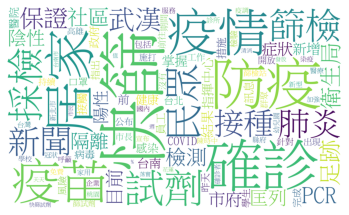

<Figure size 1000x600 with 0 Axes>

In [39]:
def generate_wordcloud(keywords, stopwords, file_path):
    wc = WordCloud(font_path = "./TW-Sung-98_1.ttf",
                   background_color = "white",
                   max_words = 100, stopwords = stopwords,
                   width = 2000, height = 1200)
    wc.generate_from_frequencies(keywords)
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize = (10, 6), dpi = 100)
    plt.show()
    wc.to_file('./文字雲/自主監測_自由.jpg')

x = generate_wordcloud(fdist, stopwords, "./selft_wordcloud1.jpg")